### ***IMPORT LIBRARIES AND LOAD THE DATASET***

This section libraries was imported for data manipulation, visualization, and clustering analysis. Libraries like numpy and pandas facilitate data handling, while matplotlib and seaborn are used for creating visualizations. The KMeans algorithm from sklearn enables customer segmentation through clustering techniques.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
customer_data = pd.read_csv("mail_customers.csv")

### ***DATA OVERVIEW AND INITIAL INSPECTION***

This foundational step allowed for effective data handling and set the stage for further exploration and segmentation of the customer data.

In [3]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


The initial inspection of the customer data revealed key attributes that would inform our analysis. Each entry included a unique CustomerID, along with demographic information such as Gender, Age, and Annual Income (k$). Notably, the Spending Score (1-100) provided insight into customer engagement levels. For example, the first five records highlighted a mix of genders and spending behaviors, showcasing potential segments ranging from budget-conscious shoppers to high-spending individuals.

In [4]:
customer_data.shape

(200, 5)

The dataset contained 200 rows and 5 columns, providing a substantial sample for conducting effective customer segmentation analysis.

In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


The dataset comprised 200 entries, with all columns showing a non-null count of 200, indicating no missing values.

In [7]:
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [8]:
print(customer_data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


**CustomerID:** *Ranges from 1 to 200, with a mean of 100.5, indicating a sequential identifier without any particular relevance to customer behavior.*

**Age:** *The average age is approximately 38.85 years, with a standard deviation of about 13.97 years, suggesting a diverse age range from 18 to 70 years. The interquartile range (IQR) shows that 50% of customers are between 28.75 and 49 years old.*

**Annual Income :** *The mean annual income is around 60.56k, with a wider range from 15k to 137k. The standard deviation of 26.26k indicates varying income levels, with most customers earning between 41.5k and 78k.*

**Spending Score (1-100):** *The average spending score stands at 50.2, with a standard deviation of 25.82, showing a significant spread in customer spending behavior. The scores range from 1 to 99, with the IQR indicating that half of the customers have spending scores between 34.75 and 73.*

### ***EXPLORATORY DATA ANALYSIS***

Exploratory Data Analysis (EDA) involves examining the dataset to uncover patterns, relationships, and insights. By utilizing visualizations like histograms and scatter plots, we can better understand customer demographics, spending habits, and income levels. This analysis will help identify distinct segments in our dataset

**GENDER DISTRIBUTION**

<ipython-input-26-f76e14975a77>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_data, x="Gender", palette="pastel")


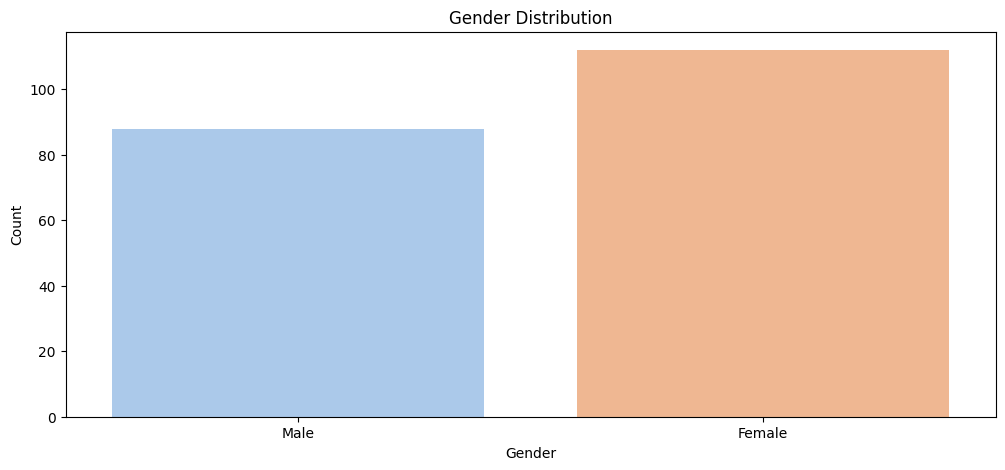

In [26]:
plt.figure(figsize=(12,5))
sns.countplot(data=customer_data, x="Gender", palette="pastel")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

*The count plot showed the gender distribution within the dataset. It revealed a relatively balanced representation, with slightly more females than males. This insight was important for understanding the customer base and could inform targeted marketing efforts, ensuring strategies were tailored to the preferences of both genders.*

**AGE DISTRIBUTION**

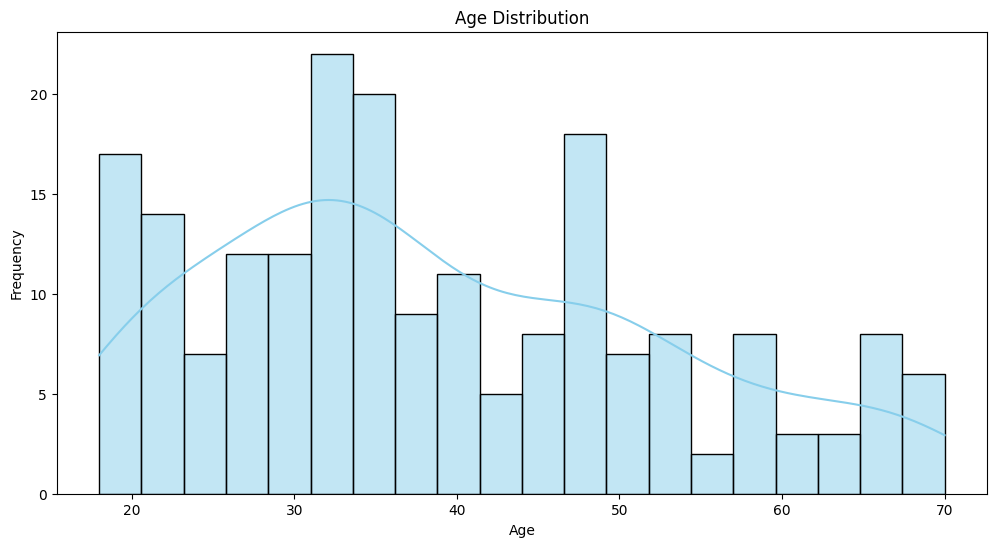

In [10]:
plt.figure(figsize=(12,6))
sns.histplot(customer_data["Age"], kde=True, bins =20, color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

*The histogram displayed the age distribution among customers, showcasing a somewhat uniform spread with it peak around the ages of 30 to 40. The frequencies indicated that younger and middle-aged groups were the most represented. The kernel density estimate (KDE) curve provided a smooth overview of this distribution, emphasizing the concentration of customers in the younger demographic. This analysis can help in tailoring marketing strategies and product offerings to better align with the preferences of the predominant age groups.*

**ANNUAL INCOME DISTRIBUTION**

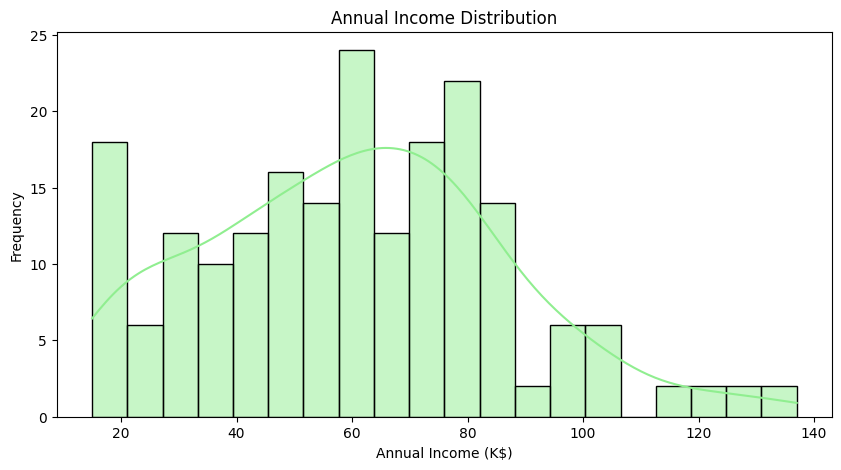

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(customer_data["Annual Income (k$)"], kde=True, bins=20, color="lightgreen")
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income (K$)")
plt.ylabel("Frequency")
plt.show()

*The distribution of yearly income among clients was shown by the histogram, which showed a pattern that was skewed to the right. The majority of people made between 40k and 80k, with the highest frequency occurring around 60k. The income distribution was depicted smoothly by the overlayed kernel density estimate (KDE) curve, which also showed how concentrated the incomes were in this range. According to this analysis, the bulk of the clientele had moderate income, while there were a few higher earners.*

**SPENDING SCORE DISTRIBUTION**

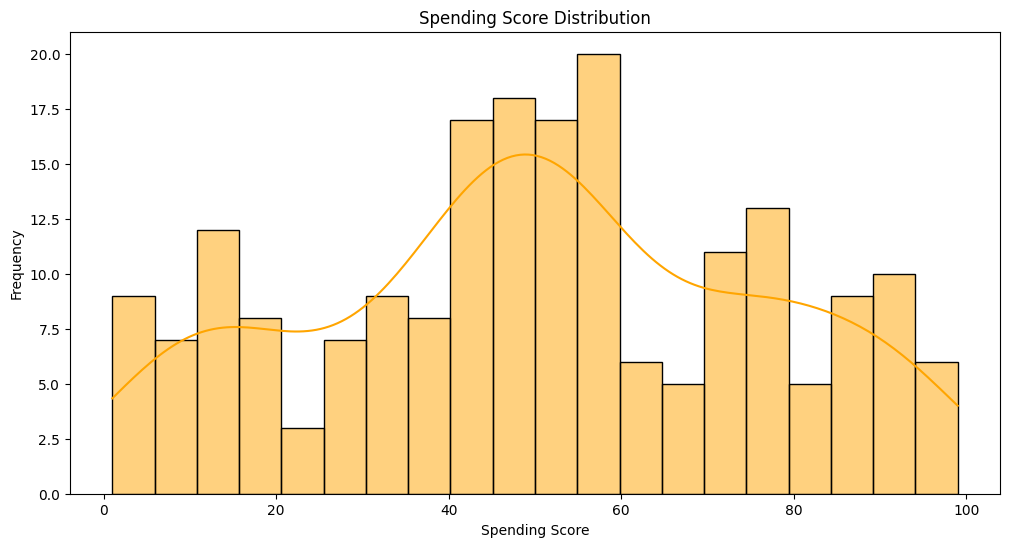

In [13]:
plt.figure(figsize=(12,6))
sns.histplot(customer_data["Spending Score (1-100)"], kde=True, bins=20, color="orange")
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score")
plt.ylabel("Frequency")
plt.show()

The histogram illustrated the distribution of spending scores among customers, with a notable concentration around the scores of 40 to 60.The kernel density estimate (KDE) curve provided a smooth representation of the spending pattern, highlighting that while many customers scored in the mid-range, there were also significant numbers at both lower and higher ends of the scale.This analysis can be instrumental for targeted marketing and understanding customer spending habits.

### ***MODELLING***

In this section, we focused on the modeling phase of this project, where we utilized machine learning techniques to analyze and segment customer data. K-Means clustering was chosen for this segmentation project due to its simplicity, efficiency, and suitability for the dataset and problem at hand. K-Means clustering is a powerful unsupervised machine learning technique used to partition a dataset into distinct groups based on similarities in their features. In this project, we applied K-Means clustering to segment our customer base, based on their spending behaviors and annual income. By identifying natural groupings within the data, K-Means allows us to gain valuable insights into customer preferences and patterns. This segmentation serves as the foundation for developing targeted marketing strategies that cater to the unique needs of each group.

**FEATURE SELECTION**

Feature selection focusing on income and spending score is crucial for our targeted marketing strategy, as it allows us to accurately segment customers based on their financial capabilities and purchasing behaviors. By prioritizing annual income and spending scores, we can identify high-value segments that are more likely to respond positively to tailored promotions. This targeted approach ensures that our marketing efforts are data-driven and aligned with customer preferences, ultimately driving engagement and boosting sales. Selecting these features enhances our ability to craft effective campaigns that resonate with each segment, making our marketing strategy more efficient and impactful.

In [14]:
# Selected features for segmentation
features = customer_data[["Annual Income (k$)", "Spending Score (1-100)"]]

print(features.head())

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


**STANDARDIZATION**

Standardization was a critical step in our analysis to ensure that selected features contributed equally to the clustering process. By scaling our data, we mitigated the influence of differing units and ranges among the features. This normalization allowed for a more accurate representation of customer spending behavior and annual income, ensuring that no single variable disproportionately affected the clustering outcomes. As a result, our customer segments were defined more clearly, leading to insights that better informed our targeted marketing strategies.

In [15]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Converted to a DataFrame for easier interpretation
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)
print(scaled_features_df.head())

   Annual Income (k$)  Spending Score (1-100)
0           -1.738999               -0.434801
1           -1.738999                1.195704
2           -1.700830               -1.715913
3           -1.700830                1.040418
4           -1.662660               -0.395980


**OPTIMAL NUMBER OF CLUSTERS**

Determining the optimal number of clusters was a key component of our analysis, and we employed the elbow method for this purpose. This technique involved plotting the variance explained by each cluster against the number of clusters and identifying the point where the rate of improvement sharply decreased, forming an "elbow." By analyzing this plot, we were able to select a number of clusters that balanced complexity and interpretability, ensuring that each segment was distinct and meaningful.

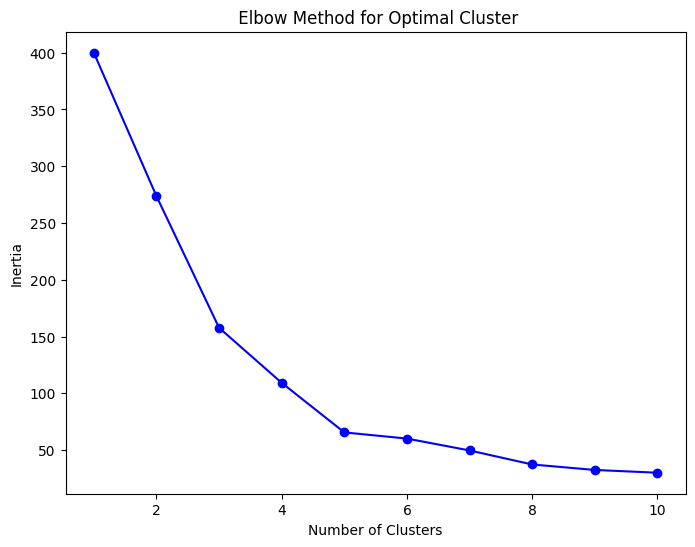

In [16]:
# Elbow Method
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_features)
  inertia.append(kmeans.inertia_)

# Elbow Curve Plot
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker="o", linestyle="-", color="b")
plt.title(" Elbow Method for Optimal Cluster")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

*Based on the elbow method depicted in the graph, we observed that the inertia significantly decreased up to around 5 clusters, after which the rate of decline slowed considerably. This indicates that 5 clusters is likely the optimal choice, as it balances a clear segmentation of customers while avoiding unnecessary complexity.*

**APPLYING K-MEANS CLUSTERING**

In this section, we implemented the K-Means clustering algorithm using the optimal number of clusters identified earlier, which was set to 5. By initializing the KMeans model with random_state=42 for reproducibility, we fit the model to the standardized features of our dataset. The resulting cluster assignments were then added to the dataset, allowing us to classify each customer into one of the four segments. Finally, we displayed the distribution of customers across these clusters, providing insight into the size and composition of each segment.

In [17]:
optimal_cluster = 5
kmeans = KMeans(n_clusters=optimal_cluster, init="k-means++", random_state=42)
customer_data["Cluster"] = kmeans.fit_predict(scaled_features)

# Cluster assignments
print(customer_data["Cluster"].value_counts())

Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


**VISUALIZATION OF THE CLUSTER**

Annual Income vs Spending Score

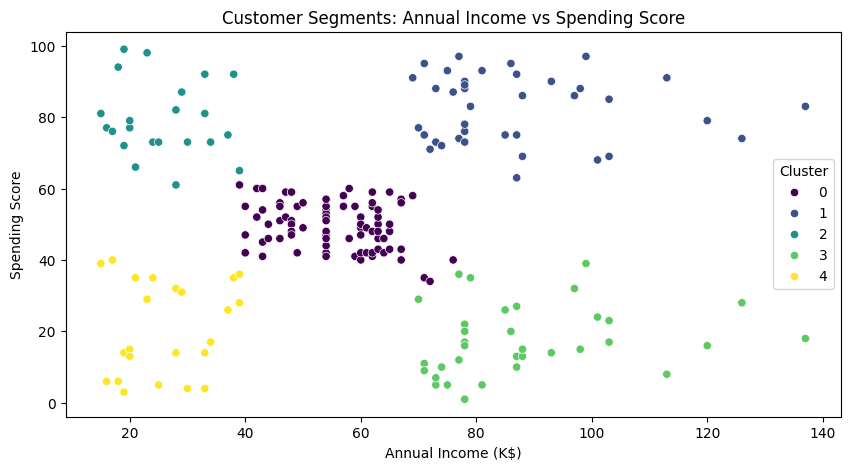

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(
    x='Annual Income (k$)',
    y="Spending Score (1-100)",
    hue="Cluster",
    palette="viridis",
    data=customer_data
)
plt.title("Customer Segments: Annual Income vs Spending Score")
plt.xlabel("Annual Income (K$)")
plt.ylabel("Spending Score")
plt.legend(title="Cluster")
plt.show()

**EVALUATING CLUSTERING PERFORMANCE**

To assess the effectiveness of our clustering approach, we calculate metrics such as the silhouette score. This score helps evaluate the quality of the clusters by measuring how similar each data point is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters, providing insights into the effectiveness of our segmentation strategy.

In [19]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(scaled_features, customer_data["Cluster"])
print(f"Silhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.55


A silhouette score of 0.55 indicates a good level of cluster separation, suggesting that our clustering approach is effective. This score signifies that the data points are well-grouped within their respective clusters and sufficiently distant from points in other clusters. Overall, this result reflects a meaningful structure in our data, enhancing our confidence in the segmentation strategy used for targeted marketing efforts.

**INTERPRETATION OF CLUSTERING RESULTS**

In [20]:
# Ensured only numeric columns are used for aggregation
numeric_data = customer_data.select_dtypes(include=[np.number])

# Add the Cluster column back to the numeric data for grouping
numeric_data["Cluster"] = customer_data["Cluster"]

# Group by clusters and calculate the mean
cluster_summary = numeric_data.groupby("Cluster").mean()

print(cluster_summary)


         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         86.320988  42.716049           55.296296               49.518519
1        162.000000  32.692308           86.538462               82.128205
2         23.090909  25.272727           25.727273               79.363636
3        164.371429  41.114286           88.200000               17.114286
4         23.000000  45.217391           26.304348               20.913043


In [24]:
customer_data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
5,6,Female,22,17,76,2
6,7,Female,35,18,6,4
7,8,Female,23,18,94,2
8,9,Male,64,19,3,4
9,10,Female,30,19,72,2
